# Logistic Regression

## Importing the libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/Python/Social_Network_Ads.csv')

In [78]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [79]:
# una persona di una certa età con un certo stipendio -> compra una macchina nuova? (1 = Si, 0 = No)
dataset

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [80]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [82]:
print(X_train[:5, :])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]]


In [83]:
print(y_train[:5])

[0 1 0 1 1]


In [84]:
print(X_test[:5, :])

[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]


In [85]:
print(y_test[:5])

[0 0 0 0 0]


## Feature Scaling

In [86]:
# unlike SVR, feature scaling is not required for Logistic Regression but it will imporve the training performance and the final predictions

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
print(X_train[:5, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


In [88]:
print(X_test[:5])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


## Training the Logistic Regression model on the Training set

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [90]:
# prediction for a person of 30 years with a salary of 87.000$
new_result_transform = sc.transform([[30, 87000]])
new_result_transform

array([[-0.80480212,  0.50496393]])

In [91]:
print(classifier.predict(new_result_transform))

[0]


In [92]:
[[prob_no, prob_yes]] = classifier.predict_proba(new_result_transform)
print("Probability of 'No':", prob_no)
print("Probability of 'Yes':", prob_yes)

Probability of 'No': 0.8872535142989061
Probability of 'Yes': 0.11274648570109395


## Predicting the Test set results

In [93]:
y_pred = classifier.predict(X_test)
compare_predSet_testSet = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
compare_predSet_testSet[:20,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0]])

## Making the Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# [ [Correct predictions of class 0       Incorrect predictions of class 1]
#   [Incorrect predictions of class 0     Correct predictions of class 1  ]  ]

[[65  3]
 [ 8 24]]


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # % of correct prediction in the test_set

0.89

## Visualising the Training set results

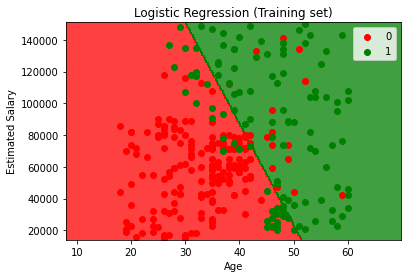

In [96]:
# this part of the code is very complex but it is very unlikely to be able to graphically show the Logistic Regression 
# because it is possible only if there is 1 independent variable, and in reality this is a very rare phenomenon

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf( X1, 
              X2, 
              classifier.predict( sc.transform(np.array([X1.ravel(), X2.ravel()]).T) ).reshape(X1.shape), 
              alpha = 0.75, 
              cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(  X_set[y_set == j, 0], 
                  X_set[y_set == j, 1], 
                  color = ListedColormap(('red', 'green'))(i), 
                  label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

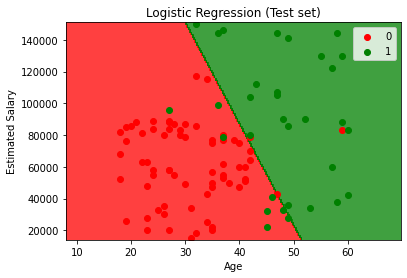

In [97]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf( X1, 
              X2, 
              classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
              alpha = 0.75, 
              cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(  X_set[y_set == j, 0], 
                  X_set[y_set == j, 1], 
                  color = ListedColormap(('red', 'green'))(i), 
                  label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()